## Polynomial Regression


In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset

dataset = pd.read_csv('Position_Salary.csv')

dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [4]:
X = dataset.iloc[:, :-1].values   # only the 'Level' column
y = dataset.iloc[:, -1].values    # only the 'Salary' column

In [5]:
print(X.shape)
y.shape

(10, 1)


(10,)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)

regressor = LinearRegression()

regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

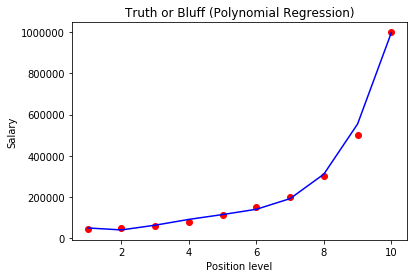

In [8]:
# Visualising the Polynomial Regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

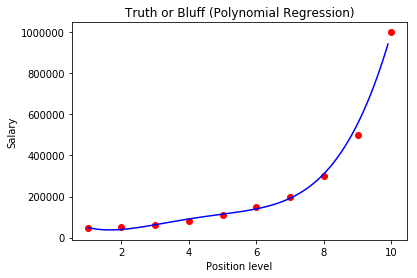

In [9]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)

# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('')
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 28553.553338500977

Mean Squared Error: 1487932926.7970207

Root Mean Squared Error: 38573.7336382806

R2 Score: 0.9692575841570863
